<a href="https://colab.research.google.com/github/Ashishjames/GRIP-TSF-Data-science-Internship/blob/main/Task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP : The Sparks Foundation

## Data Science and Business Analytics Internship

## Task 1: Prediction Using Supervised ML
Objective: To predict the percentage of a student based on the number of study hours.

## Author: Manu.S.Pillai

Dataset link: http://bit.ly/w-data

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

##Reading Data

In [2]:
# Reading data from source url
df= pd.read_csv("http://bit.ly/w-data")

In [3]:
# Top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are 25 rows & 2 columns with no null values.

In [5]:
# Statistical insights
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking for co-relation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

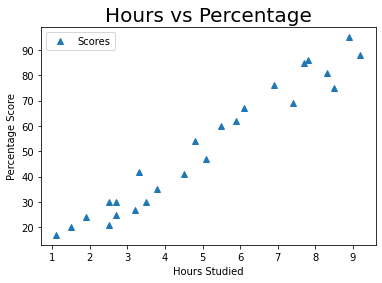

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='^')  
plt.title('Hours vs Percentage', fontsize=20)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

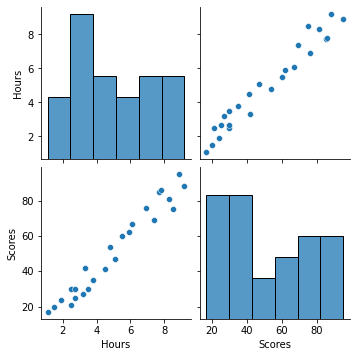

In [8]:
sns.pairplot(df)

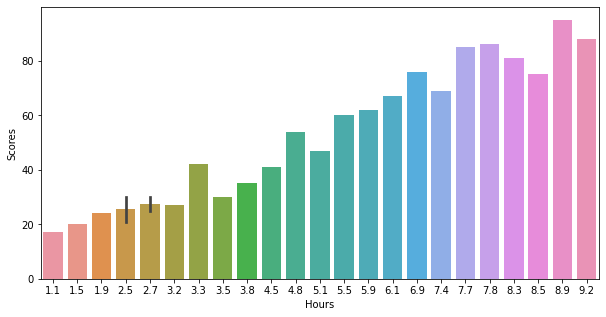

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hours', y= 'Scores', data= df)
plt.show()

## Modelling

In [10]:
# Splitting the data for training and testing.
X= df.drop('Scores',axis=1)
y= df['Scores'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [11]:
X_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [12]:
y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

## Training Algorithm

In [13]:
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

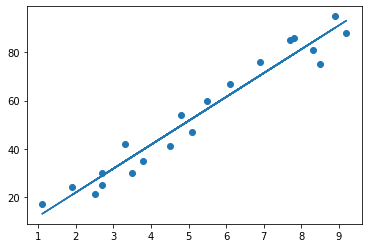

In [14]:
# Plotting the Regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train));
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
# Predicting the scores
print(X_test) 
y_pred = model.predict(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


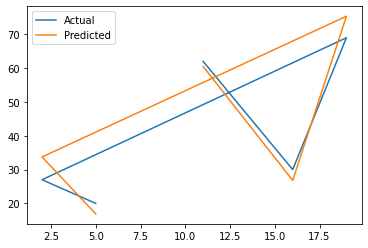

In [17]:
compare.plot()

##Evaluating model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error ,mean square error & R2-Score. There are many such metrics.

In [18]:
print("Training score: ", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Training score:  0.9515510725211552
Test score:  0.9454906892105354


In [19]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Square Error:", mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
Mean Square Error: 21.598769307217456


In [20]:
print("R-squared score:", r2_score(y_test, y_pred))

R-squared score: 0.9454906892105354


Closer the R2-score to 1, the better the regression fit.

## Problem statement: What will be predicted score if a student studies for 9.25 hrs/day?

In [21]:
hours = 9.25
score_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**The predicted score for a student who studies 9.25 hrs/day is 93.69**